# Multivariable_Regression

In [7]:
library(ggplot2)

## Innovation in insurance Industry
 - 보험업계의 혁신에 대한 연구
 - 혁신을 받아들이는데 걸리는 시간이 회사 규모와 유형에 따라 달라지는가?
 - Y: 혁신을 받아들이는데까지 걸리는기간을 월 단위로측정
 - X1: 회사의자산규모
 - X2: 회사 유형 (stock, mutual)

In [5]:
insurance <- read.csv("insurance.csv")
head(insuracne,3)

,time,size,type
1,17,151,Mutual
2,26,92,Mutual
3,21,175,Mutual


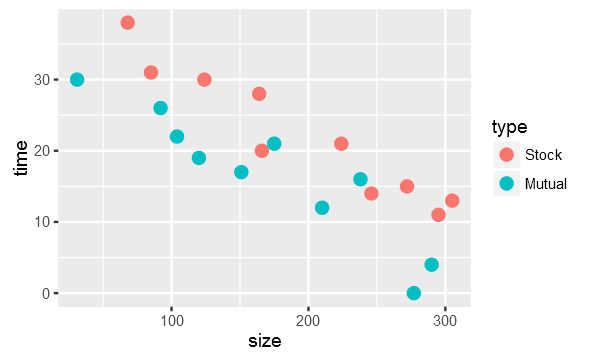

In [13]:
options(repr.plot.width=5,repr.plot.height=3)
ggplot(insuracne,aes(x=size,y=time,color=type)) + geom_point(size=3)

 - 음의 상관관계  
 <img src="photo/1.PNG" width=600>

In [14]:
cor(insuracne$time,insuracne$size)

[1] -0.8407769

<img src="photo/2.PNG">

In [15]:
model1 <- lm(time~size+type,insuracne)
summary(model1)


Call:
lm(formula = time ~ size + type, data = insuracne)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.6915 -1.7036 -0.4385  1.9210  6.3406 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 41.929538   2.010101  20.859 1.50e-13 ***
size        -0.101742   0.008891 -11.443 2.07e-09 ***
typeMutual  -8.055469   1.459106  -5.521 3.74e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.221 on 17 degrees of freedom
Multiple R-squared:  0.8951,	Adjusted R-squared:  0.8827 
F-statistic:  72.5 on 2 and 17 DF,  p-value: 4.765e-09


 - Stock = 33.87+8.055 -0.101$ \beta_1$
 - Mutual = 33.87 - 0.101$\beta_1$

 - Machine learning 에서 배운 Matirx의 합으로 수식을 최소화하는 방법과 같다. 
  - (Intercept) = 1 
  - Matrix 곱

In [20]:
head(model1$fitted.values,3)

1        2        3 
18.51101 24.51379 16.06920

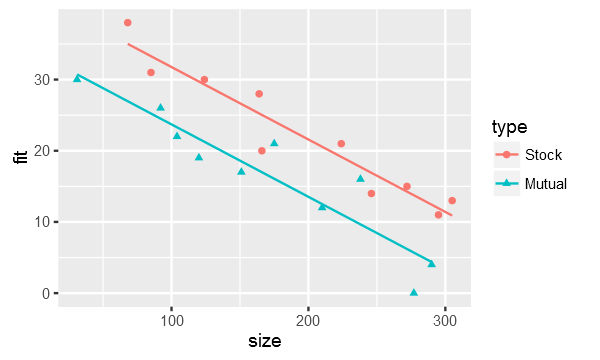

In [18]:
insuracne$fit = model1$fitted.values
gg <- ggplot(insuracne,aes(y=fit,x=size,group=type,color=type)) + geom_line() 
gg + geom_point(aes(y=time,x=size,shape=type))

In [16]:
model.matrix(time~size+type,insuracne)

,(Intercept),size,typeMutual
1,1,151,1
2,1,92,1
3,1,175,1
4,1,31,1
5,1,104,1
6,1,277,1
7,1,210,1
8,1,120,1
9,1,290,1
10,1,238,1


<img src="photo/3.PNG">

# Reference Level 조정. 
### type(0 if stock, 1 if mutual)

In [21]:
insuracne$type = relevel(insuracne$type,ref="Stock")
model2 = lm(time ~ ., insuracne)
summary(model2)


Call:
lm(formula = time ~ ., data = insuracne)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.6915 -1.7036 -0.4385  1.9210  6.3406 

Coefficients: (1 not defined because of singularities)
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 41.929538   2.010101  20.859 1.50e-13 ***
size        -0.101742   0.008891 -11.443 2.07e-09 ***
typeMutual  -8.055469   1.459106  -5.521 3.74e-05 ***
fit                NA         NA      NA       NA    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.221 on 17 degrees of freedom
Multiple R-squared:  0.8951,	Adjusted R-squared:  0.8827 
F-statistic:  72.5 on 2 and 17 DF,  p-value: 4.765e-09


In [23]:
model.matrix(time~size+type,insuracne)

,(Intercept),size,typeMutual
1,1,151,1
2,1,92,1
3,1,175,1
4,1,31,1
5,1,104,1
6,1,277,1
7,1,210,1
8,1,120,1
9,1,290,1
10,1,238,1


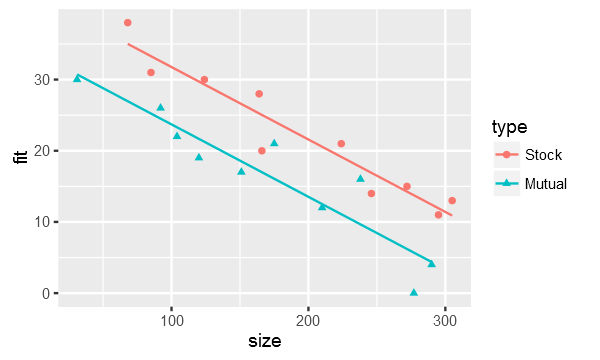

In [24]:
insuracne$fit = model2$fitted.values
gg <- ggplot(insuracne,aes(y=fit,x=size,group=type,color=type)) + geom_line() 
gg + geom_point(aes(y=time,x=size,shape=type))

<img src="photo/4.PNG">

# Making dummy Variable

In [28]:
insuracne <- insuracne[,-c(4)] # if there is fit_value, delete fit_value

In [29]:
contr.sum(insuracne$type)

Mutual,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Mutual,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Mutual,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Mutual,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Mutual,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Mutual,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
Mutual,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
Mutual,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
Mutual,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
Mutual,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
Stock,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [30]:
model3 = lm(time~.,insuracne,contrasts = list(type=contr.sum))
model.matrix(time~.,insuracne,contrasts = list(type=contr.sum))

,(Intercept),size,type1
1,1,151,-1
2,1,92,-1
3,1,175,-1
4,1,31,-1
5,1,104,-1
6,1,277,-1
7,1,210,-1
8,1,120,-1
9,1,290,-1
10,1,238,-1


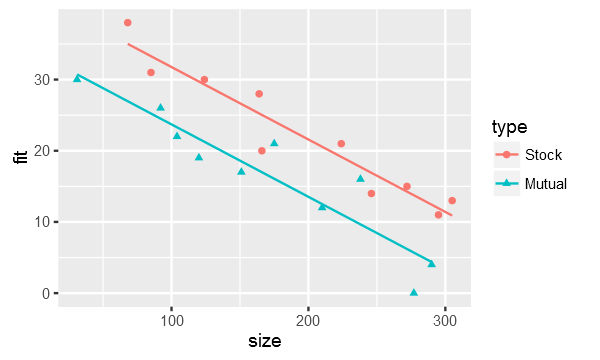

In [31]:
insuracne$fit = model3$fitted.values
gg <- ggplot(insuracne,aes(y=fit,x=size,group=type,color=type)) + geom_line() 
gg + geom_point(aes(y=time,x=size,shape=type))